# Batch segmentation with text prompts

[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeos/segment-geospatial/blob/main/docs/examples/text_prompts_batch.ipynb)
[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeos/segment-geospatial/blob/main/docs/examples/text_prompts_batch.ipynb)

This notebook shows how to generate object masks from text prompts with the Segment Anything Model (SAM).

Make sure you use GPU runtime for this notebook. For Google Colab, go to `Runtime` -> `Change runtime type` and select `GPU` as the hardware accelerator.

## Install dependencies

Uncomment and run the following cell to install the required dependencies.

In [1]:
%pip install segment-geospatial groundingdino-py leafmap localtileserver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import leafmap
from samgeo import tms_to_geotiff, split_raster
from samgeo.text_sam import LangSAM

## Create an interactive map

In [2]:
m = leafmap.Map(center=[42.314434, -71.100484], zoom=13, height="800px")
m.add_basemap("SATELLITE")
m

Map(center=[42.314434, -71.100484], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

## Download a sample image

Pan and zoom the map to select the area of interest. Use the draw tools to draw a polygon or rectangle on the map

In [3]:
bbox = m.user_roi_bounds()
if bbox is None:
    bbox = [-51.4494, -22.1307, -51.4371, -22.1244]

In [4]:
image = "Image.tif"
tms_to_geotiff(output=image, bbox=bbox, zoom=19, source="Satellite", overwrite=True)

Downloaded image 0001/4956
Downloaded image 0002/4956
Downloaded image 0003/4956
Downloaded image 0004/4956
Downloaded image 0005/4956
Downloaded image 0006/4956
Downloaded image 0007/4956
Downloaded image 0008/4956
Downloaded image 0009/4956
Downloaded image 0010/4956
Downloaded image 0011/4956
Downloaded image 0012/4956
Downloaded image 0013/4956
Downloaded image 0014/4956
Downloaded image 0015/4956
Downloaded image 0016/4956
Downloaded image 0017/4956
Downloaded image 0018/4956
Downloaded image 0019/4956
Downloaded image 0020/4956
Downloaded image 0021/4956
Downloaded image 0022/4956
Downloaded image 0023/4956
Downloaded image 0024/4956
Downloaded image 0025/4956
Downloaded image 0026/4956
Downloaded image 0027/4956
Downloaded image 0028/4956
Downloaded image 0029/4956
Downloaded image 0030/4956
Downloaded image 0031/4956
Downloaded image 0032/4956
Downloaded image 0033/4956
Downloaded image 0034/4956
Downloaded image 0035/4956
Downloaded image 0036/4956
Downloaded image 0037/4956
D

You can also use your own image. Uncomment and run the following cell to use your own image.

In [ ]:
# image = '/path/to/your/own/image.tif'

Display the downloaded image on the map.

In [5]:
m.layers[-1].visible = False
m.add_raster(image, layer_name="Image")
m

Map(bottom=776428.0, center=[42.311, -71.1042], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zo…

## Split the image into tiles

In [6]:
split_raster(image, out_dir="tiles", tile_size=(1000, 1000), overlap=0)

## Initialize LangSAM class

The initialization of the LangSAM class might take a few minutes. The initialization downloads the model weights and sets up the model for inference.

In [7]:
sam = LangSAM()

GroundingDINO_SwinB.cfg.py:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

groundingdino_swinb_cogcoor.pth:   0%|          | 0.00/938M [00:00<?, ?B/s]

Downloading: "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth" to /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.39G/2.39G [00:27<00:00, 92.1MB/s]


## Specify text prompts

In [8]:
text_prompt = "tree"

## Segment images

Part of the model prediction includes setting appropriate thresholds for object detection and text association with the detected objects. These threshold values range from 0 to 1 and are set while calling the predict method of the LangSAM class.

`box_threshold`: This value is used for object detection in the image. A higher value makes the model more selective, identifying only the most confident object instances, leading to fewer overall detections. A lower value, conversely, makes the model more tolerant, leading to increased detections, including potentially less confident ones.

`text_threshold`: This value is used to associate the detected objects with the provided text prompt. A higher value requires a stronger association between the object and the text prompt, leading to more precise but potentially fewer associations. A lower value allows for looser associations, which could increase the number of associations but also introduce less precise matches.

Remember to test different threshold values on your specific data. The optimal threshold can vary depending on the quality and nature of your images, as well as the specificity of your text prompts. Make sure to choose a balance that suits your requirements, whether that's precision or recall.

In [9]:
sam.predict_batch(
    images="tiles",
    out_dir="masks",
    text_prompt=text_prompt,
    box_threshold=0.24,
    text_threshold=0.24,
    mask_multiplier=255,
    dtype="uint8",
    merge=True,
    verbose=True,
)

Processing image 001 of 330: tiles/tile_0_0.tif...
Processing image 002 of 330: tiles/tile_0_1.tif...
Processing image 003 of 330: tiles/tile_0_10.tif...
Processing image 004 of 330: tiles/tile_0_11.tif...
Processing image 005 of 330: tiles/tile_0_12.tif...
Processing image 006 of 330: tiles/tile_0_13.tif...
Processing image 007 of 330: tiles/tile_0_14.tif...
Processing image 008 of 330: tiles/tile_0_2.tif...
Processing image 009 of 330: tiles/tile_0_3.tif...
Processing image 010 of 330: tiles/tile_0_4.tif...
Processing image 011 of 330: tiles/tile_0_5.tif...
Processing image 012 of 330: tiles/tile_0_6.tif...
Processing image 013 of 330: tiles/tile_0_7.tif...
Processing image 014 of 330: tiles/tile_0_8.tif...
Processing image 015 of 330: tiles/tile_0_9.tif...
Processing image 016 of 330: tiles/tile_10_0.tif...
Processing image 017 of 330: tiles/tile_10_1.tif...
Processing image 018 of 330: tiles/tile_10_10.tif...
Processing image 019 of 330: tiles/tile_10_11.tif...
Processing image 020

## Visualize the results

In [10]:
m.add_raster("masks/merged.tif", cmap="viridis", nodata=0, layer_name="Mask")
m

Map(bottom=776428.0, center=[42.311, -71.1041995], controls=(ZoomControl(options=['position', 'zoom_in_text', …

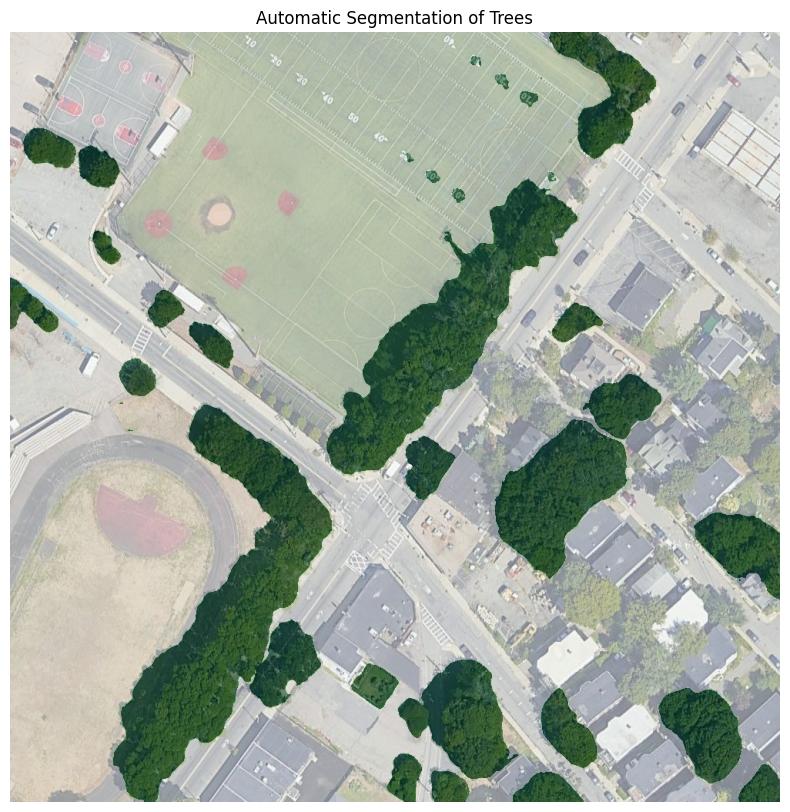

In [11]:
sam.show_anns(
    cmap="Greens",
    add_boxes=False,
    alpha=0.5,
    title="Automatic Segmentation of Trees",
)